In [51]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
db = pd.read_csv('VkerDB.csv')
db.shape

(1934, 11)

In [3]:
db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1934 entries, 0 to 1933
Data columns (total 11 columns):
id             1934 non-null int64
date           1934 non-null object
price          1934 non-null float64
price_sqm      1934 non-null int64
room           1934 non-null float64
sqm            1934 non-null float64
region         1067 non-null object
description    1027 non-null object
agency         758 non-null object
url            1934 non-null object
source         1934 non-null object
dtypes: float64(3), int64(2), object(6)
memory usage: 166.3+ KB


In [10]:
db['date'] = pd.to_datetime(db['date'])
db.dtypes

id                      int64
date           datetime64[ns]
price                 float64
price_sqm               int64
room                  float64
sqm                   float64
region                 object
description            object
agency                 object
url                    object
source                 object
dtype: object

In [11]:
#com data is not continuous so excluded
#count all ads at given date
itemcounts = db[db['source'] != 'com'].groupby('date').agg({'id': 'count', 
                       'sqm': 'mean', 
                       'price': ['mean','median','min','max']})

In [107]:
#db[db['source'] != 'com'].groupby('date').agg({'price': 'guantile(0.25)'})
itemcounts.

id        sqm      price                            Q75      Q25
           count       mean       mean median    min   max                    
date                                                                          
2018-11-04    21  30.714286  36.540476   34.9  24.75  49.0  39.655357  32.3625
2018-11-11    20  30.600000  37.237500   34.9  24.75  49.0  40.178125  32.3625
2018-11-14    19  30.789474  36.034211   34.9  24.75  44.0  38.025658  32.3625
2018-11-21    17  30.294118  36.702941   34.9  24.75  44.0  38.527206  32.3625
2018-12-04    21  30.428571  35.101905   33.9  24.75  44.0  37.326429  31.6125

'\nthe number of ads plummeted between April 2019 - September 2019\nSince September the numbere of ads hit up\n'

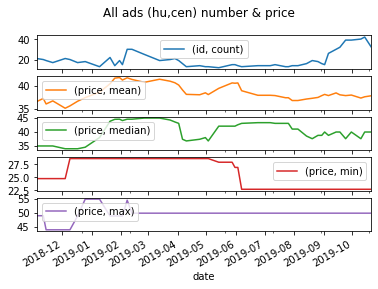

In [23]:
itemcounts[['id', 'price']].plot(subplots=True, sharex = True, \
                                 title = 'All ads (hu,cen) number & price')
;
'''
the number of ads plummeted between April 2019 - September 2019
Since September the numbere of ads hit up
'''

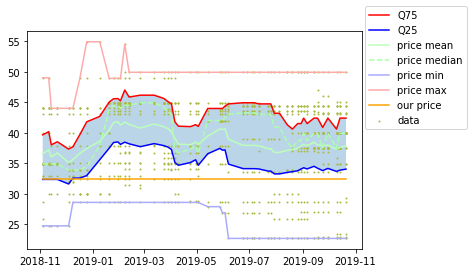

In [103]:
fig = plt.figure(figsize=(6,4))
plt.plot(itemcounts.index, itemcounts[['Q75']],c='r', label ='Q75')
plt.plot(itemcounts.index, itemcounts[['Q25']], c ='b', label = 'Q25')
plt.plot(itemcounts.index, itemcounts[('price','mean')],c='#bbffbb', label = 'price mean')
plt.plot(itemcounts.index, itemcounts[('price', 'median')],c='#aaffaa',  linestyle='--', label = 'price median')
plt.plot(itemcounts.index, itemcounts[('price','min')], c= '#aaaaff', label = 'price min')
plt.plot(itemcounts.index, itemcounts[('price','max')], c='#ffaaaa', label = 'price max')
plt.fill_between(itemcounts.index,itemcounts['Q25'],itemcounts['Q75'], alpha = 0.3)
plt.plot(itemcounts.index, np.repeat(32.5, len(itemcounts)),c='orange', label='our price')
plt.scatter(db.loc[(db['source'] != 'com'),'date'], db.loc[db['source'] != 'com','price'],s = 1, c='#aabb44', label= 'data' )
plt.legend(loc = (1.01,0.55))
plt.show()

In [100]:
# ads lifetime: com excluded, 156 individual ads over a year
db1= db.loc[(db['source'] != 'com')].groupby('id').agg({'date': ['count', 'min','max'], 'price': 'mean', 'price_sqm': 'mean'}).sort_values([('date','max'),('date','count')])
#exclude the one still active: 124
maxdates = db1[('date','max')].unique()
inact = db1.loc[db1[('date','max')] != maxdates[-1]]
act = db1.loc[db1[('date','max')] == maxdates[-1]]

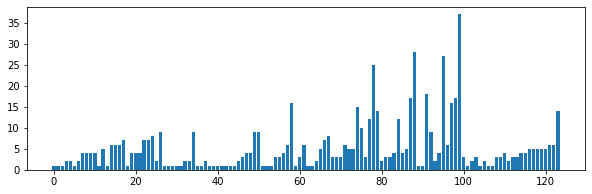

In [123]:
fig = plt.figure(figsize=(10,3))
plt.bar(range(len(inact.index)), inact[('date','count')].values)
plt.show()
#inact[['price', 'price_sqm',]].hist(figsize=(10,2),sharex =True, bins=15)
#act[['price', 'price_sqm',]].hist(figsize=(10,3), sharex = True, bins=15);
# previous one year vs latest 

In [8]:
unique = db.groupby('id').agg({'id': 'count','price': 'mean', 'price_sqm': 'mean', 'sqm': 'mean','date': 'min'})

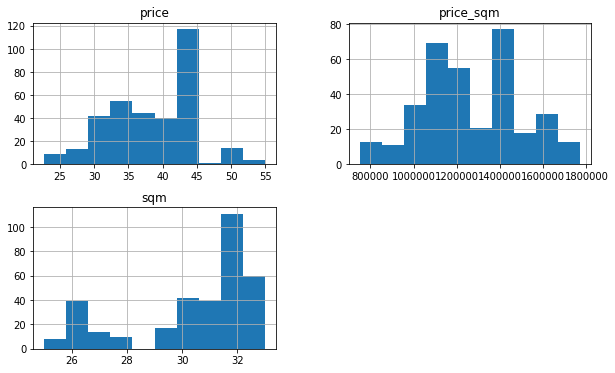

In [9]:
#db[['price', 'price_sqm', 'sqm']].hist(figsize=(10,6))
unique[['price', 'price_sqm', 'sqm']].hist(figsize=(10,6));

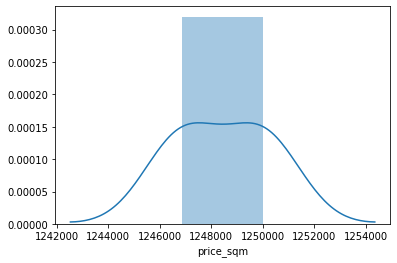

In [169]:
import seaborn as sns
g = unique.loc[unique['date'] == '2019-09-30']
sns.distplot(g['price_sqm'])

In [165]:
set(unique['date'].values.tolist())

{'2018-11-04',
 '2018-11-11',
 '2018-11-14',
 '2018-11-21',
 '2018-12-04',
 '2018-12-09',
 '2018-12-17',
 '2018-12-25',
 '2019-01-02',
 '2019-01-09',
 '2019-01-20',
 '2019-01-25',
 '2019-01-30',
 '2019-02-02',
 '2019-02-07',
 '2019-02-12',
 '2019-02-25',
 '2019-03-13',
 '2019-03-24',
 '2019-03-29',
 '2019-04-24',
 '2019-04-30',
 '2019-05-14',
 '2019-05-28',
 '2019-06-03',
 '2019-06-07',
 '2019-06-24',
 '2019-06-28',
 '2019-07-12',
 '2019-07-30',
 '2019-08-14',
 '2019-08-20',
 '2019-09-06',
 '2019-09-14',
 '2019-09-18',
 '2019-09-24',
 '2019-09-30',
 '2019-10-10',
 '2019-10-14',
 '2019-10-21'}

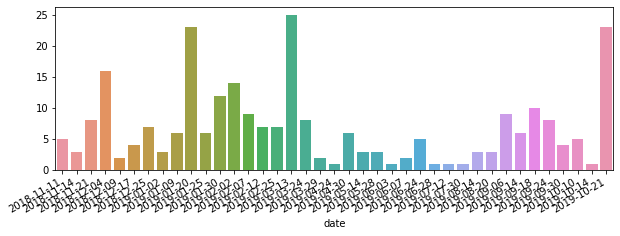

In [177]:
fig = plt.figure(figsize=(10,3))
news = unique.groupby('date')['price'].count()[1:]
sns.barplot(news.index,news.values)
plt.xticks(rotation=30, ha = 'right' )
plt.show()